# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [101]:
# Import relevant libraries
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

import datetime 

from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [102]:
# # Open a Chrome window using Splinter
my_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [103]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [104]:
# Create a Beautiful Soup Object
html = browser.html

#soupify the string
soup = BeautifulSoup(html, 'html.parser')

In [105]:
table = soup.find("table", {"class": "table"})
rows = table.find_all("tr", {"class": "data-row"})

len(rows)

1867

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [106]:
#columns
columns = table.find_all('th')
column_ids = [column.text for column in columns]
column_ids

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [107]:
#datarows
rows = table.find_all("tr", {"class": "data-row"})

# Create an empty list
data_rows = []
    
# Loop through the scraped data to create a list of rows
for row in rows:
    fields = row.find_all('td')       
    data_row = [(field.text) for field in fields]
    
    data_rows.append(data_row)

len(data_rows)

1867

In [108]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_rows, columns=column_ids)

# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [109]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [110]:
# Change data types for data analysis
df['id'] = pd.to_numeric(df['id'])
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
df['sol'] = pd.to_numeric(df['sol'])
df['ls'] = pd.to_numeric(df['ls'])
df['month'] = pd.to_numeric(df['month'])
df['min_temp'] = pd.to_numeric(df['min_temp'])
df['pressure'] = pd.to_numeric(df['pressure'])

In [111]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [112]:
# 1. How many months are there on Mars?
df.month.nunique()

12

1. 12 months exist on Mars

In [113]:
# 2. How many Martian days' worth of data are there?
df.sol.nunique()

1867

2. There are 1867 Martian days worth of data

In [114]:
# 3. What is the average low temperature by month?
avg_min_temp = df.groupby(['month'])['min_temp'].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

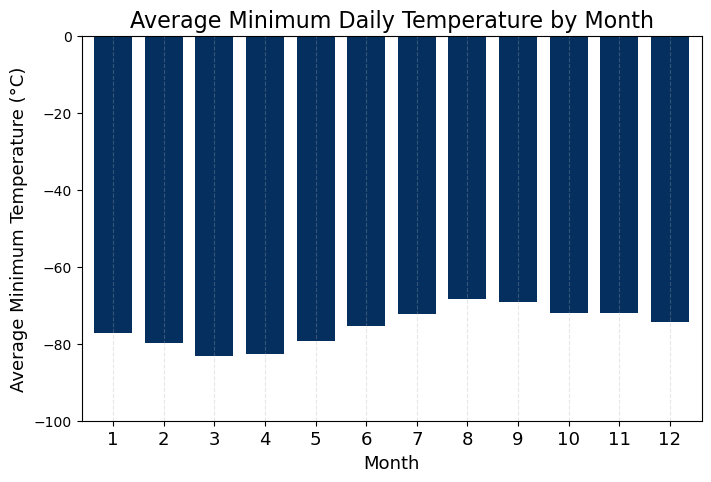

In [115]:
# Plot the average temperature by month
plt.figure(figsize=(8, 5))

avg_min_temp.plot(kind='bar', color='#052f5f', width=.75)


plt.xlabel('Month', fontsize=13)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=13)
plt.title('Average Minimum Daily Temperature by Month', fontsize=16)

plt.ylim(-100,0)             
plt.xticks(ticks=range(0,12,1), rotation=0, fontsize=13)
plt.grid(axis='x', linestyle="--", alpha=.3)


plt.show()

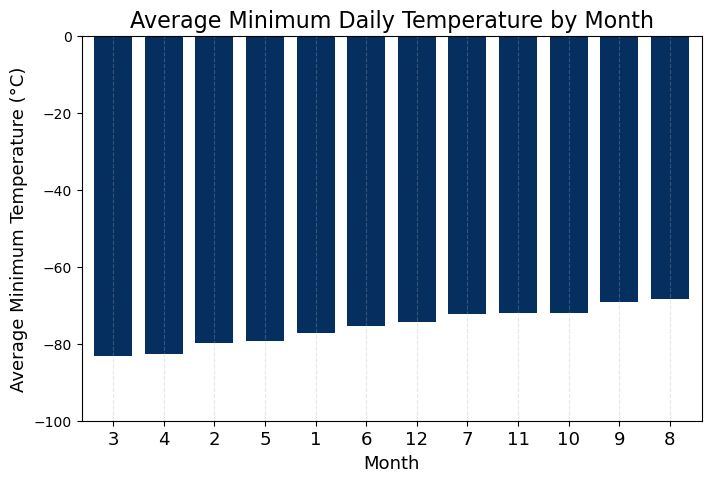

In [116]:
# Plot the average temperature by month
plt.figure(figsize=(8, 5))

avg_min_temp.sort_values().plot(kind='bar', color='#052f5f', width=.75)


plt.xlabel('Month', fontsize=13)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=13)
plt.title('Average Minimum Daily Temperature by Month', fontsize=16)

plt.ylim(-100,0)         
plt.xticks(ticks=range(0,12,1), rotation=0, fontsize=13)
plt.grid(axis='x', linestyle="--", alpha=.3)


plt.show()

In [117]:
# Identify the coldest and hottest months in Curiosity's location
#coldest = third month
#hottest = eighth month 

3. The coldest month in Curiosity's location is the third month. The Hottest month in Curosity's location is the eighth month.

In [118]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

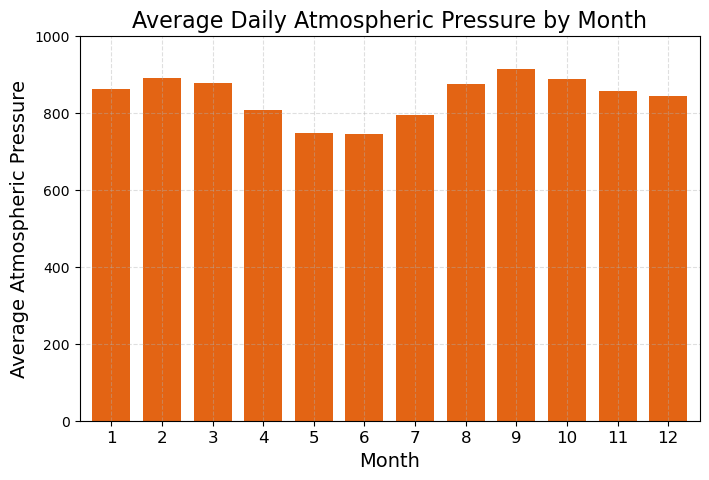

In [119]:
# Plot the average pressure by month
plt.figure(figsize=(8,5))

avg_pressure.plot(kind='bar', color='#e36414', width=.75)

plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Atmospheric Pressure', fontsize=14)
plt.title('Average Daily Atmospheric Pressure by Month', fontsize=16)

plt.ylim(0,1000)
plt.xticks(rotation=0, fontsize=12)
plt.grid(linestyle="--", alpha=.4)

plt.show()

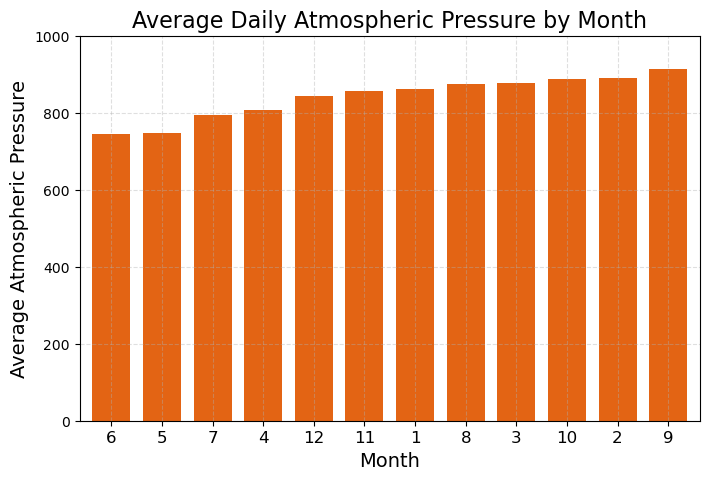

In [120]:
# Plot the average pressure by month
plt.figure(figsize=(8,5))

avg_pressure.sort_values().plot(kind='bar', color='#e36414', width=.75)

plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Atmospheric Pressure', fontsize=14)
plt.title('Average Daily Atmospheric Pressure by Month', fontsize=16)

plt.ylim(0,1000)
plt.xticks(rotation=0, fontsize=12)
plt.grid(linestyle="--", alpha=.4)

plt.show()

In [121]:
#Which months have the lowest and the highest atmospheric pressure 
#highest = ninth month
#lowest = sixth month

4. On average, the sixth month has the lowest atmospheric pressue and the ninth month has the highest atmospheric pressure

/var/folders/jf/2172hndd7zv4fznws878lj3h0000gn/T/ipykernel_63377/3096055309.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=df['terrestrial_date'].min(), end=df['terrestrial_date'].max(), freq='12M')


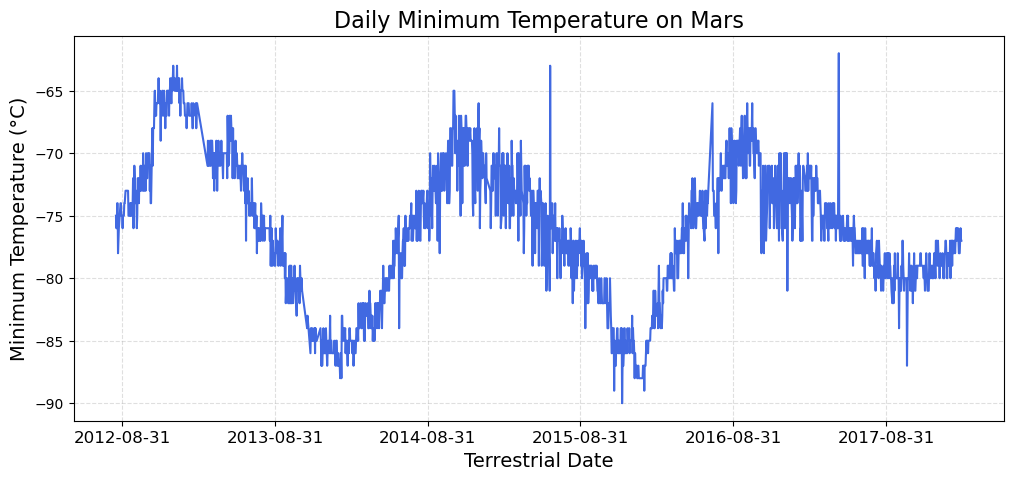

In [122]:
# Plot the daily minimum temperature over time
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

plt.figure(figsize=(12, 5))

plt.plot(df['terrestrial_date'], df['min_temp'], label='Daily Minimum Temperature', color="royalblue")

plt.title('Daily Minimum Temperature on Mars', fontsize=16)
plt.xlabel('Terrestrial Date', fontsize=14)
plt.ylabel('Minimum Temperature (°C)', fontsize=14)

#chat gbt for xtick date range
date_range = pd.date_range(start=df['terrestrial_date'].min(), end=df['terrestrial_date'].max(), freq='12M')

plt.xticks(date_range, fontsize=12, rotation=0)

plt.legend
plt.grid(linestyle="--", alpha=.4)

plt.show()

/var/folders/jf/2172hndd7zv4fznws878lj3h0000gn/T/ipykernel_63377/2374780546.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=df['terrestrial_date'].min(), end=df['terrestrial_date'].max(), freq='2M')


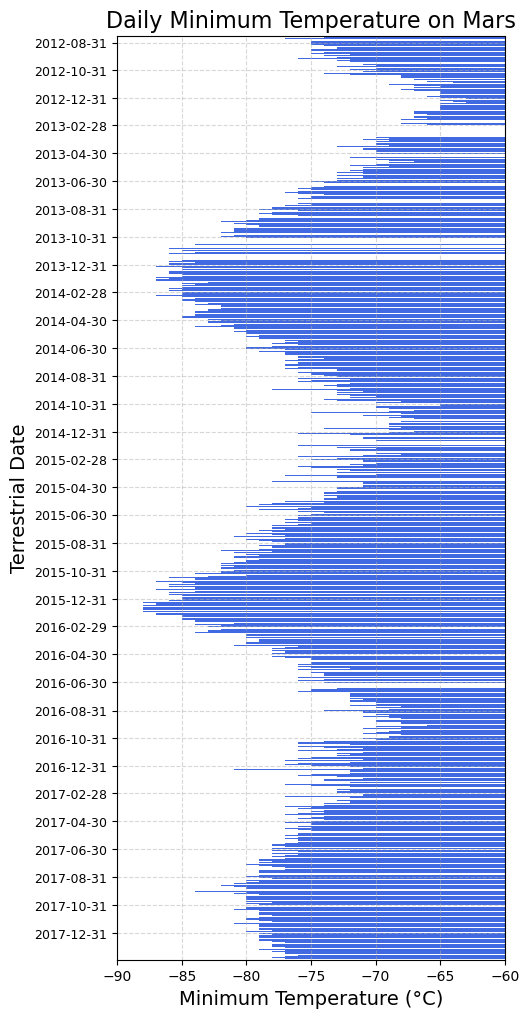

In [123]:
# Plot the daily minimum temperature over time
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

plt.figure(figsize=(5, 12))

plt.barh(df['terrestrial_date'], df['min_temp'], label='Daily Minimum Temperature', color="royalblue")

plt.title('Daily Minimum Temperature on Mars', fontsize=16)
plt.ylabel('Terrestrial Date', fontsize=14)
plt.xlabel('Minimum Temperature (°C)', fontsize=14)

#chat gbt for xtick date range
date_range = pd.date_range(start=df['terrestrial_date'].min(), end=df['terrestrial_date'].max(), freq='2M')

plt.xlim(-90, -60)
plt.ylim(df['terrestrial_date'].max(), df['terrestrial_date'].min())
plt.yticks(date_range, fontsize=9, rotation=0)

plt.legend
plt.grid(linestyle="--", alpha=.5)

plt.show()

5. Visually one martian year looks like it would range from 2014-01-28 to 2015-11-30 which is 671 days

In [124]:
#around 671 days based on the Daily Minimum temp visualization 
#1 year = 2014-1-28 through 2015-11-30

from datetime import date
date1 = date(2014, 1, 28)
date2 = date(2015, 11, 30)

# Calculate the number of days between the two dates
delta1 = date2 - date1

print(delta1.days)

671


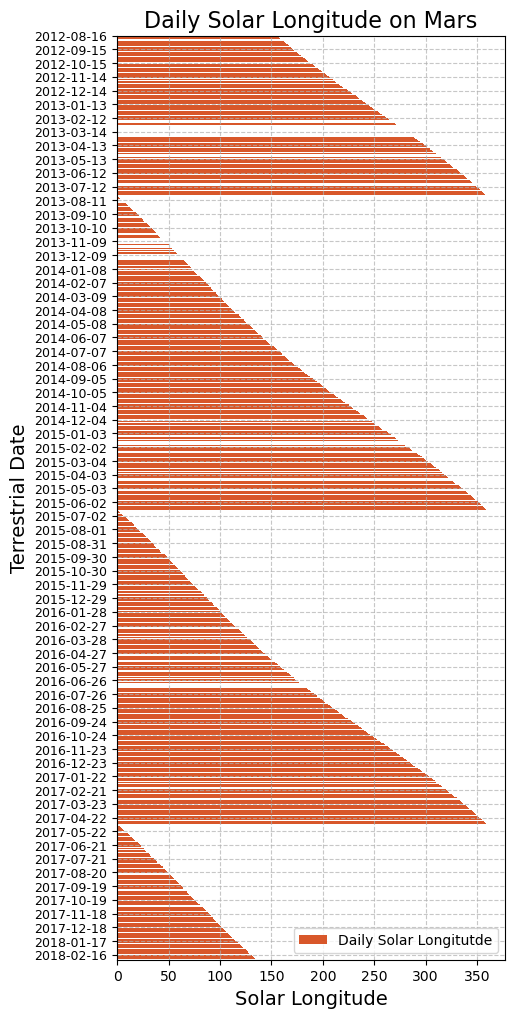

In [125]:
# Plot solar longitude over time
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

plt.figure(figsize=(5, 12))

plt.barh(df['terrestrial_date'], df['ls'], label='Daily Solar Longitutde', color="#d8572a")

plt.title('Daily Solar Longitude on Mars', fontsize=16)
plt.ylabel('Terrestrial Date', fontsize=14)
plt.xlabel('Solar Longitude', fontsize=14)

#chat gbt for xtick date range
date_range = pd.date_range(start=df['terrestrial_date'].min(), end=df['terrestrial_date'].max(), freq='30D')

plt.ylim(df['terrestrial_date'].max(), df['terrestrial_date'].min())
plt.yticks(date_range, fontsize=9)

plt.legend()
plt.grid(linestyle="--", alpha=.7)
plt.show()

In [126]:
#1 year estimate based on solar longitude = 2013-8-11 through 2015-6-15, 673 days
from datetime import date
date1 = date(2013, 8, 11)
date2 = date(2015, 6, 15)

# Calculate the number of days between the two dates
delta1 = date2 - date1

print(delta1.days)

673


On average, the coldest month is the third month and the hottest month is the eighth month in Curiosity's location.



On average, the sixth month has the lowest atmospheric pressue and the ninth month has the highest atmospheric pressure

Using a visualization of min temperatures one martian year appears to range from 2014-01-28 through 2015-11-30 which is 671 earth days. 
Using a visualization of the solar longitudes one Martian year appears to be from 2013-08-11 through 2015-6-15 which is 673 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [127]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [129]:
# Write the data to a CSV
df.to_csv("mars_weather.csv", index=False)

In [78]:
browser.quit()